<a href="https://colab.research.google.com/github/kaleabendrias/data_sc/blob/main/stock_market_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
data = pd.read_csv('Tesla.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [89]:
training_set = data.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[ 19.      ]
 [ 25.790001]
 [ 25.      ]
 ...
 [257.      ]
 [262.399994]
 [264.      ]]
(1692, 1)


In [90]:
# Normalize the dataset
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.01053291]
 [0.03553936]
 [0.03262991]
 ...
 [0.88704743]
 [0.90693471]
 [0.91282727]]


In [91]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
labels = training_set_scaled[:, -1]
X_train, X_test, y_train, y_test = train_test_split(training_set_scaled, labels, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

x_train = []
y_train = []

for i in range(60, len(X_train)):
    x_train.append(X_train[i-60:i, 0])
    y_train.append(X_train[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


print("Shape of x_train after reshaping:", x_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (1353, 1)
Shape of X_test: (339, 1)
Shape of x_train after reshaping: (1293, 60)
Shape of y_train: (1293,)


In [92]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1293, 60, 1)

In [93]:
# build the model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [94]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [95]:
#fitiing the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
41/41 [==============================] - 13s 104ms/step - loss: 0.1369
Epoch 2/100
41/41 [==============================] - 4s 99ms/step - loss: 0.1251
Epoch 3/100
41/41 [==============================] - 5s 120ms/step - loss: 0.1223
Epoch 4/100
41/41 [==============================] - 4s 98ms/step - loss: 0.1246
Epoch 5/100
41/41 [==============================] - 4s 106ms/step - loss: 0.1230
Epoch 6/100
41/41 [==============================] - 5s 111ms/step - loss: 0.1208
Epoch 7/100
41/41 [==============================] - 4s 97ms/step - loss: 0.1219
Epoch 8/100
41/41 [==============================] - 5s 112ms/step - loss: 0.1206
Epoch 9/100
41/41 [==============================] - 5s 125ms/step - loss: 0.1219
Epoch 10/100
41/41 [==============================] - 4s 98ms/step - loss: 0.1218
Epoch 11/100
41/41 [==============================] - 6s 143ms/step - loss: 0.1195
Epoch 12/100
41/41 [==============================] - 4s 99ms/step - loss: 0.1203
Epoch 13/100
41/4

In [99]:
# Reshape X_test for prediction
x_test = X_test

# Predictions
y_pred = regressor.predict(x_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared on test set:", r_squared)


11/11 [==============================] - 0s 3ms/step
Mean Squared Error on test set: 0.13807873450321678
R-squared on test set: -0.08651478803293022


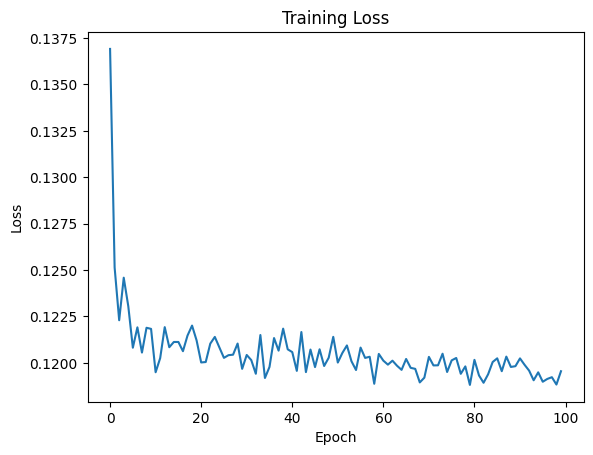

In [97]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
